# Caelan Osman
## Math 437

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 3]

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [17]:
def euler(func, deltaT, iniT, finalT, ini_val):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
     Parameters:
        func (function): The right-hand side of the ODE
        deltaT (float): step size
        iniT (float): initial t value
        finalT (float): final t value
        ini_val (float): initial x value condition
    Returns:
        t_vals (ndarray): discrete t values
        x_vals (ndarray): discrete x values
    """
    #set up t values and initial array vectors
    t_vals = np.linspace(iniT, finalT, int(np.floor(finalT/deltaT)) +1)
    ini_val = np.atleast_1d(ini_val)
    x_vals = np.zeros((ini_val.size, t_vals.size))
    x_vals *= ini_val.reshape((-1, 1))
    
    #discreteize solution
    #for 1 dimesional problems
    if ini_val.size == 1:
        for i in range(1, t_vals.size):
            x_vals[0, i] = x_vals[0, i-1] + deltaT * f(x_vals[0, i-1], t_vals[i-1])
            
    #for multi dimensional problems
    else:
        for i in range(1, t_vals.size):
            x_vals[:, i] = x_vals[:, i-1] + deltaT*f(x_vals[:, i-1], t_vals[i-1]) 
    #return solution
    return t_vals, x_vals[0]

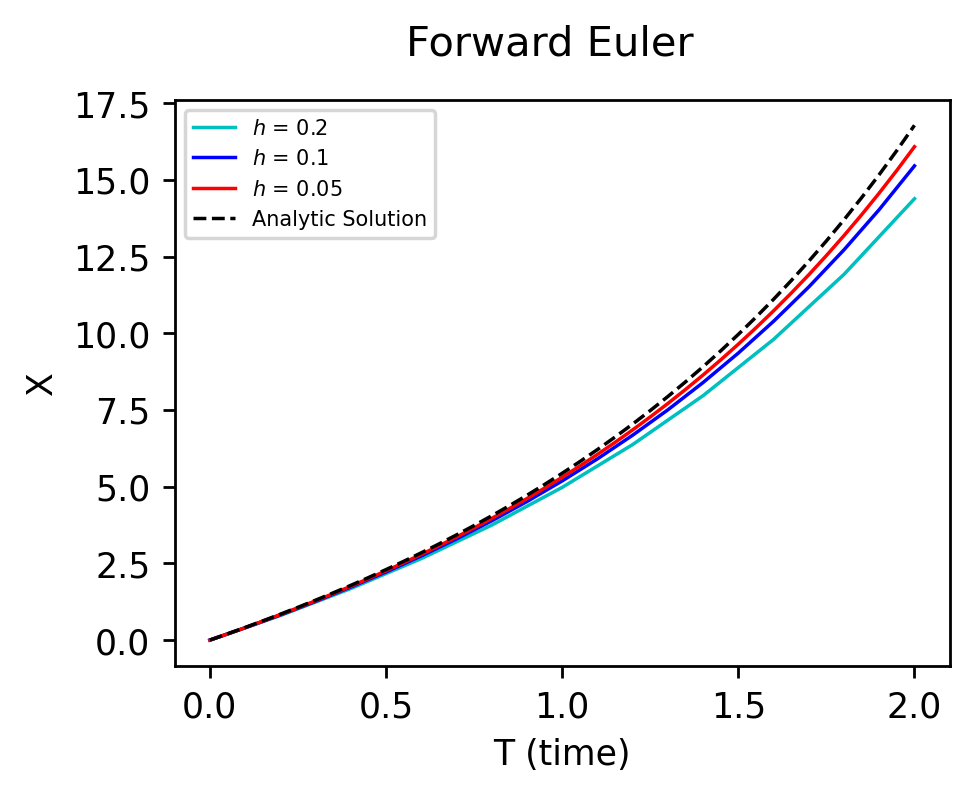

In [18]:
#define ode, analytic solution, and initial conditions
#and possible deltas
f = lambda x, t: x - 2*t +4
analytic = lambda t: 2*(t + np.exp(t) - 1)
x0 = 0
t0 = 0
tf = 2
delta = [0.2, 0.1, 0.05]

#plot
colors = ['c-', 'b-', 'r-']
fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(111)

for i in range(len(delta) +1):
    #plot analytic solution
    if i == len(delta):
        ax.plot(ts, analytic(ts), 'k--', lw=1, label='Analytic Solution')
        ax.legend(loc='best', prop={'size':6})
        ax.set_xlabel('T (time)')
        ax.set_ylabel('X')
    #plot numerical solutions
    else:
        ts, xs = euler(f, delta[i], t0, tf, x0)
        ax.plot(ts, xs, colors[i], lw=1, label=r'$h$ = ' + str(delta[i]))
        ax.legend(loc='best', prop={'size':6})
        
plt.suptitle('Forward Euler')
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [19]:
def midpoint(func, deltaT, iniT, finalT, ini_val):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        func (function): The right-hand side of the ODE
        deltaT (float): step size
        iniT (float): initial t value
        finalT (float): final t value
        ini_val (float): initial x value condition
    Returns:
        t_vals (ndarray): discrete t values
        x_vals (ndarray): discrete x values
    """
    #set t values
    t_vals = np.linspace(iniT, finalT, int(np.floor(finalT/deltaT)) +1)
    #initialize x values
    ini_val = np.atleast_1d(ini_val)
    x_vals = np.ones((ini_val.size, t_vals.size))
    x_vals *= ini_val.reshape(-1, 1)
    #discretize solution
    #for single dimensional problems
    if ini_val.size == 1:
        for i in range(1, t_vals.size):
            x_temp = x_vals[0, i-1] + deltaT / 2 * func(x_vals[0, i-1], t_vals[i-1])
            x_vals[0, i] = x_vals[0, i-1] + deltaT * func(x_temp, t_vals[i-1] + deltaT/2)
    
    #for multi dimensional problems        
    else:
        for i in range(1, t_vals.size):
            x_temp = x_vals[:, i-1] + deltaT / 2 * func(x_vals[:, i-1], t_vals[i-1])
            x_vals[:, i] = x_vals[:, i-1] + deltaT * func(x_temp, t_vals[i-1] + deltaT/2)
        
        
    return t_vals, x_vals[0]


def rk4(func, deltaT, iniT, finalT, ini_val):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
     Parameters:
        func (function): The right-hand side of the ODE
        deltaT (float): step size
        iniT (float): initial t value
        finalT (float): final t value
        ini_val (float): initial x value condition
    Returns:
        t_vals (ndarray): discrete t values
        x_vals (ndarray): discrete x values
    """
    #set update functions
    k1 = func
    k2 = lambda x, t: func(x + (deltaT/2) * k1(x, t), t + deltaT/2)
    k3 = lambda x, t: func(x + (deltaT/2) * k2(x, t), t + deltaT/2)
    k4 = lambda x, t: func(x + deltaT * k3(x, t), t + deltaT)
    
    #set intial arrays extra cases in the case of vector valued functions
    t_vals = np.linspace(iniT, finalT, int(np.floor(finalT/deltaT)) +1)
    ini_val = np.atleast_1d(ini_val)
    x_vals = np.ones((ini_val.size, t_vals.size))
    x_vals *= ini_val.reshape(-1, 1)
    
    #discreteize.
    #for single dimensional problems
    if len(ini_val) == 1:
        for i in range(1, t_vals.size):
            x_vals[0, i] = x_vals[0, i-1] + ((deltaT / 6) * (k1(x_vals[0, i-1], t_vals[i-1]) 
                                                           + 2*k2(x_vals[0, i-1], t_vals[ i-1])
                                                           + 2*k3(x_vals[0, i-1], t_vals[i-1])
                                                             + k4(x_vals[0, i-1], t_vals[i-1])))
    #for multi dimensional problems
    else:
        for i in range(1, t_vals.size):
            x_vals[:, i] = x_vals[:, i-1] + ((deltaT / 6) * (k1(x_vals[:, i-1], t_vals[ i-1]) 
                                                             + 2*k2(x_vals[:, i-1], t_vals[ i-1])
                                                             + 2*k3(x_vals[:, i-1], t_vals[i-1]) 
                                                             + k4(x_vals[:, i-1], t_vals[i-1])))
    return t_vals, x_vals[0]


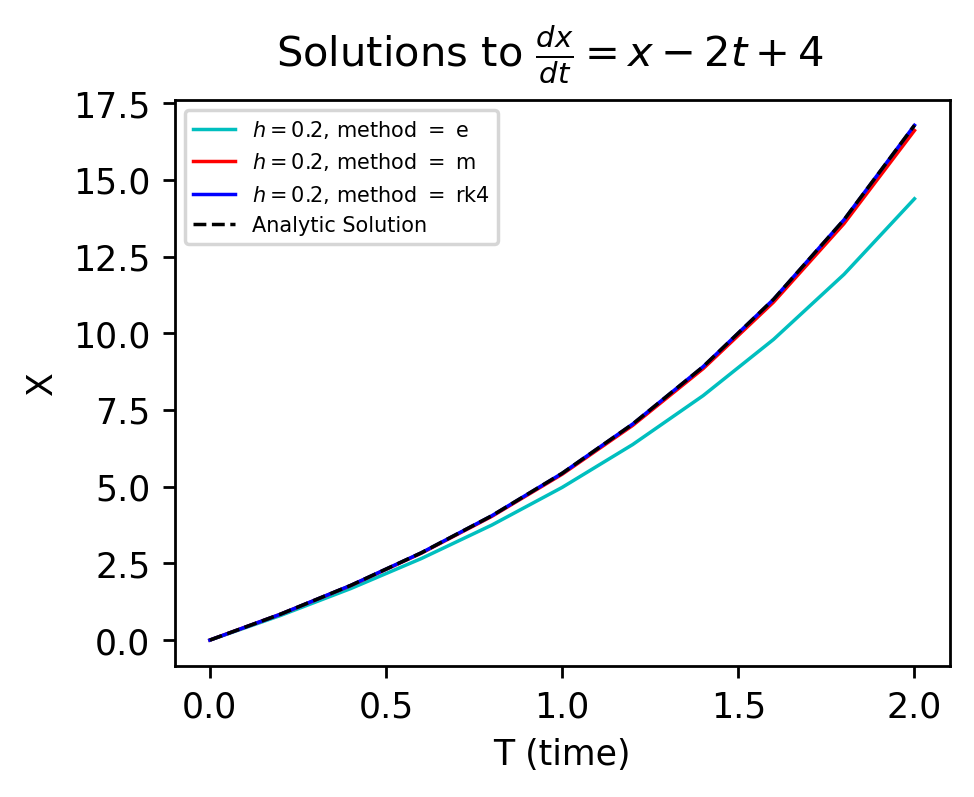

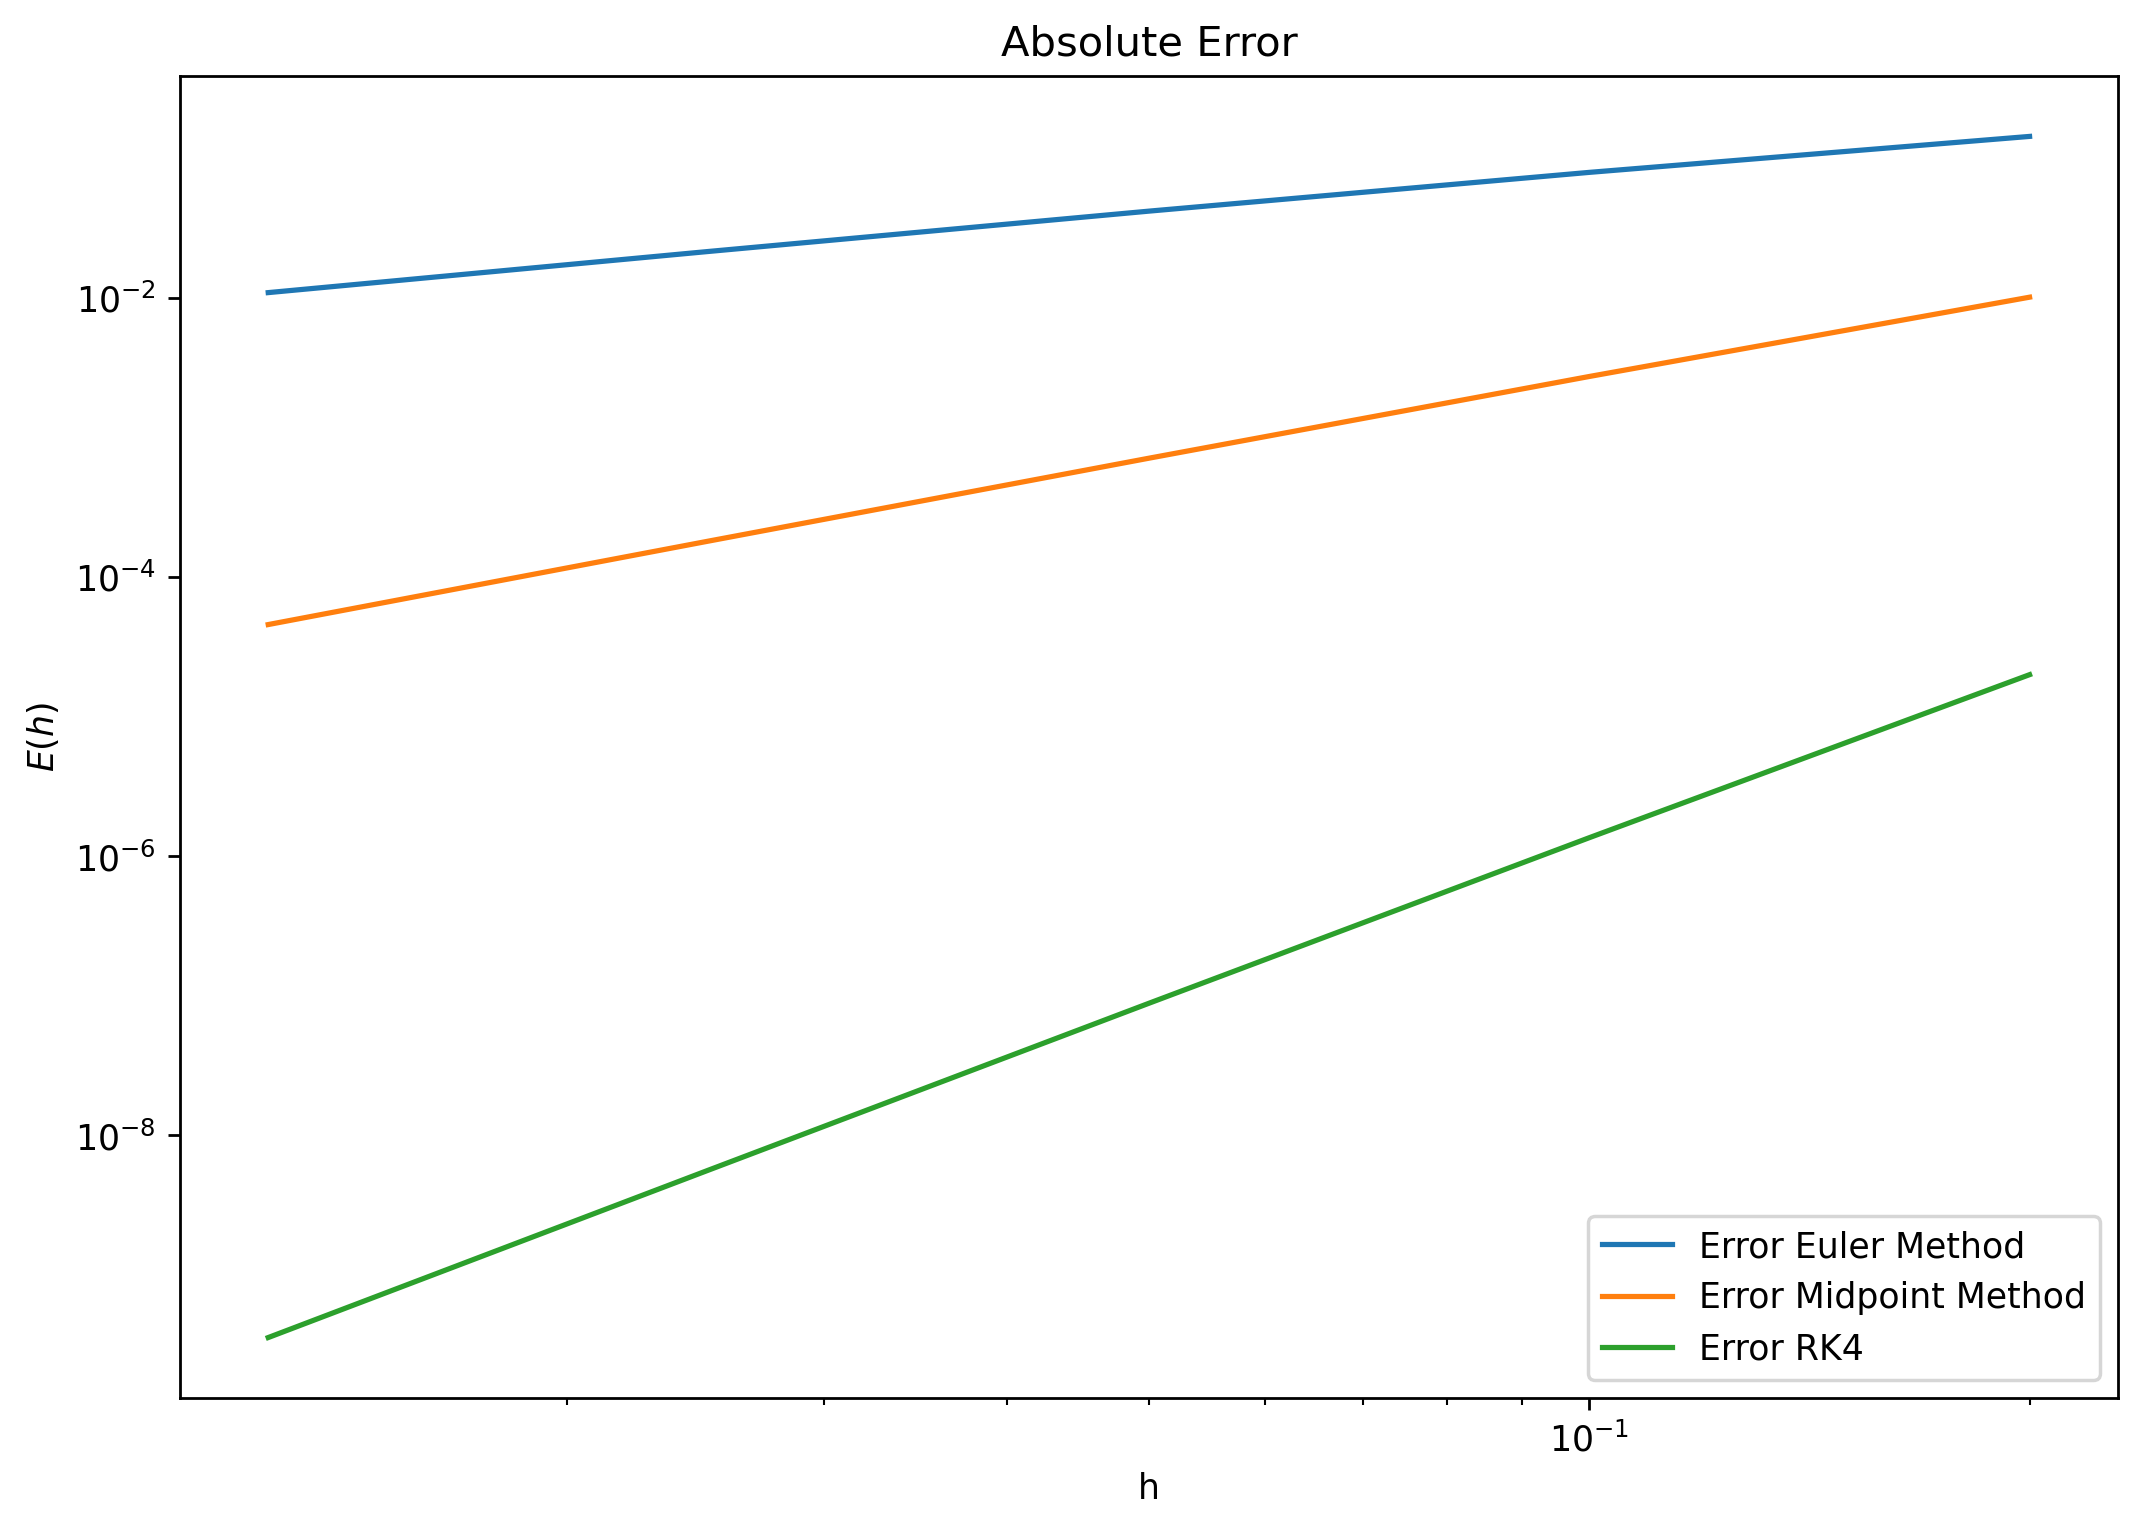

In [28]:
#helper function for plotting.
def method_helper(func, deltaT, iniT, finalT, ini_val, method):
    if method == 'e':
        return euler(func, deltaT, iniT, finalT, ini_val)
    elif method == 'm':
        return midpoint(func, deltaT, iniT, finalT, ini_val)
    elif method == 'rk4':
        return rk4(func, deltaT, iniT, finalT, ini_val)
    else:
        raise ValueError('Method needs to be one of "e", "m", or "rk4"')

#define ode and analytic solution as well as initial conditions and step size
f = lambda x, t: x - 2*t +4
analytic = lambda t: 2*(t + np.exp(t) - 1)
x0 = 0
t0 = 0
tf = 2
h = 0.2
#used for plotting
colors = ['c-', 'r-', 'b-', 'k--']
methods = ['e', 'm', 'rk4', 'a']
fig = plt.figure()
fig.set_dpi(250)
ax = fig.add_subplot(111)

for i, method in enumerate(methods):
    #plot euler method
    if i != 3:
        ts, xs = method_helper(f, h, t0, tf, x0, method)
        ax.plot(ts, xs, colors[i], lw=1, label=r'$h = $' + str(h) + r', method $=$ ' + method)
        ax.legend(loc='best', prop={'size':6})
        ax.set_xlabel('T (time)')
        ax.set_ylabel('X')
    else:
        ax.plot(ts, analytic(ts), colors[i], lw=1, label='Analytic Solution')
        ax.legend(loc='best', prop={'size':6})
        ax.set_xlabel('T (time)')
        ax.set_ylabel('X')
plt.suptitle(r'Solutions to $\frac{dx}{dt} = x-2t+4$')
plt.show()

#set absolute error function
absolute_error = lambda final: np.abs(analytic(2) -final)/np.abs(analytic(2))

#get h_vals and error
h_vals = [0.2, 0.1, 0.05, 0.025, 0.0125]
error_euler = [absolute_error(euler(f, h, t0, tf, x0)[-1][-1]) for h in h_vals ]
error_midpoint = [absolute_error(midpoint(f, h, t0, tf, x0)[-1][-1]) for h in h_vals]
error_rk4 = [absolute_error(rk4(f, h, t0, tf, x0)[-1][-1]) for h in h_vals]

#plot error
fig = plt.figure(figsize=(10, 7))
fig.set_dpi(250)
ax = fig.add_subplot(111)
ax.loglog(h_vals, error_euler, label='Error Euler Method')
ax.loglog(h_vals, error_midpoint, label='Error Midpoint Method')
ax.loglog(h_vals, error_rk4, label='Error RK4')
ax.legend(loc='best')
ax.set_xlabel('h')
ax.set_ylabel(r'$E(h)$')
ax.set_title('Absolute Error')
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

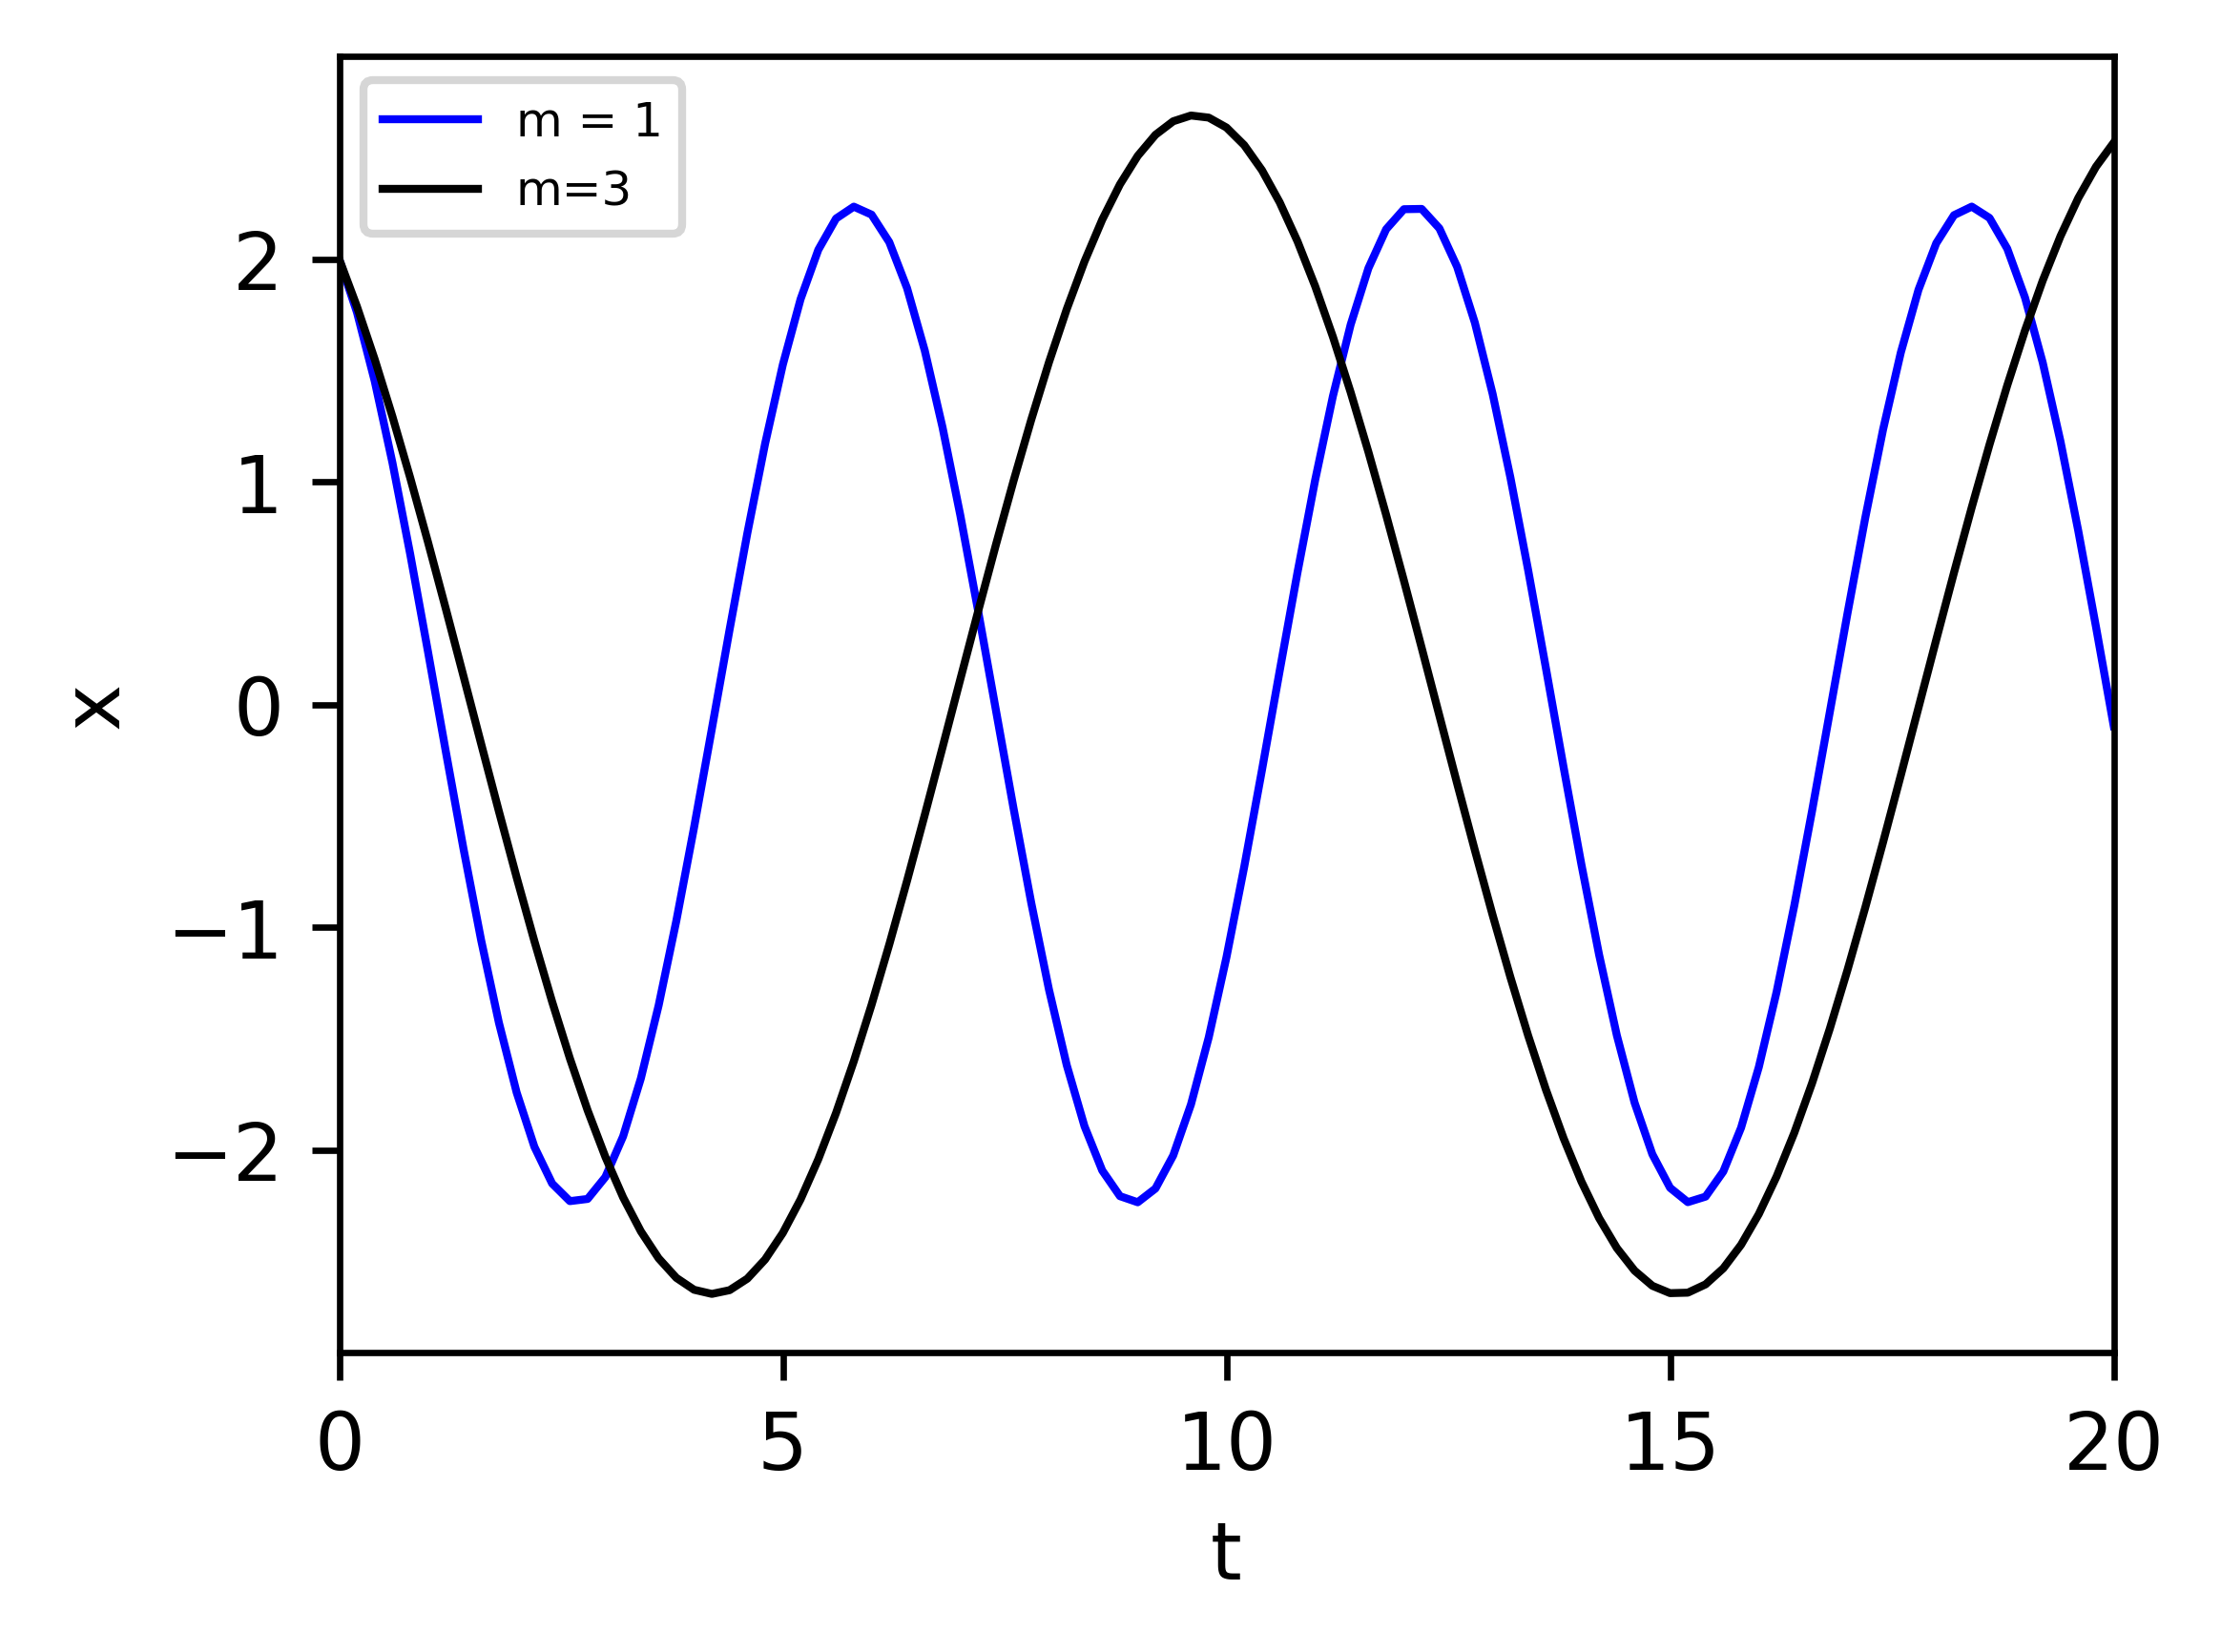

In [21]:
m, k = 1, 1
f = lambda x ,t: np.array([x[1], -k*x[0]/m])
x0 = np.array([2, -1])
t0 = 0
tf = 20
h = 0.2

t, m1 = rk4(f, h, t0, tf, x0)
m = 3
_, m3 = rk4(f, h, t0, tf, x0)
fig = plt.figure()
fig.set_dpi(600)
ax = fig.add_subplot(111)

ax.plot(t, m1, 'b-',lw=1, label='m = 1')
ax.plot(t, m3, 'k-', lw=1, label='m=3')
ax.legend(loc='best', prop={'size':6})
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_xlim([t0, tf])
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

We split this up into a system as follows. Let $y_1 = y$ and $y_2 = y'$ then we get
\begin{align}
y_1' &= y_2\\
y_2' &= - \gamma y_2 - y_1
\end{align}

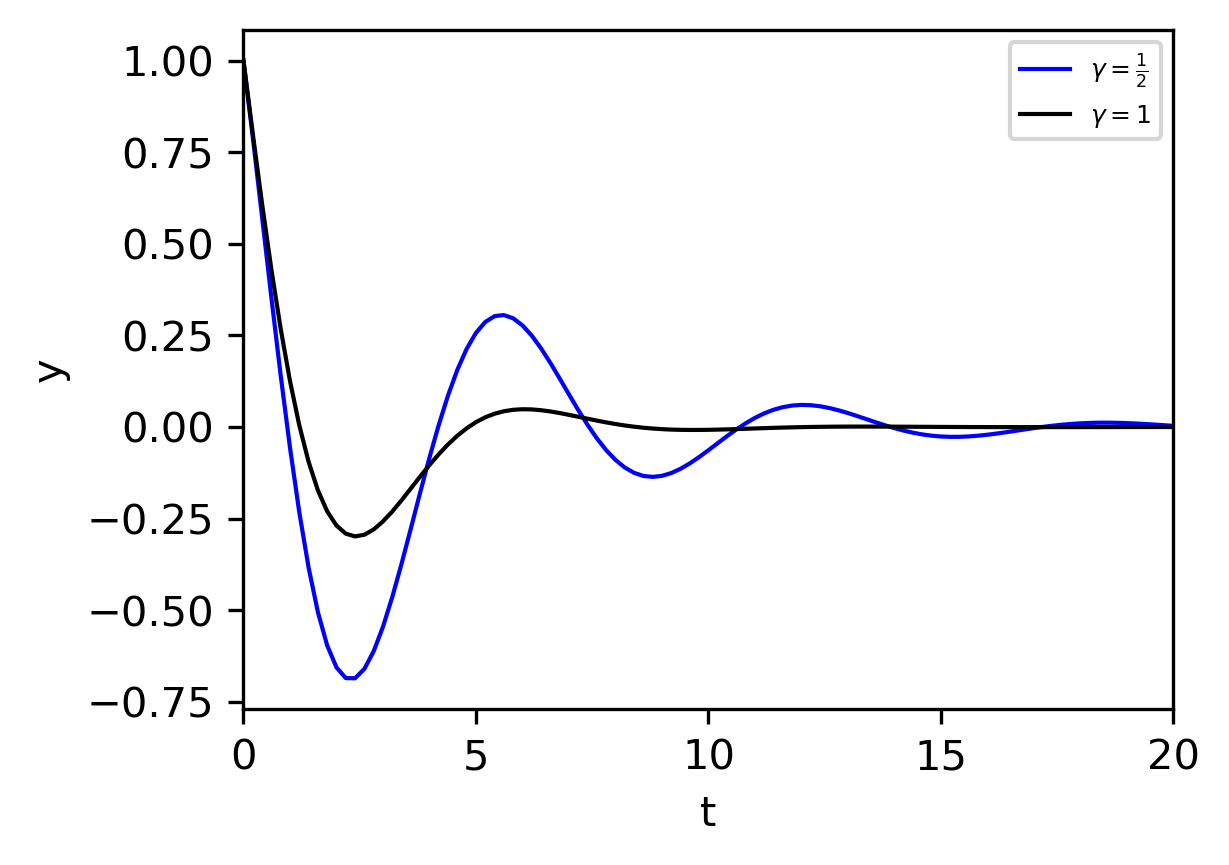

In [22]:
gam = 1/2.
f = lambda y, t: np.array([y[1], -gam*y[1] - y[0]])
t0 = 0
tf = 20
h = 0.2
y0 = np.array([1, -1])
t, gam1 = rk4(f, h, t0, tf, y0)
gam = 1
_, gam2 = rk4(f, h, t0, tf, y0)

fig = plt.figure()
fig.set_dpi(300)
ax = fig.add_subplot(111)

ax.plot(t, gam1, 'b-',lw=1, label=r'$\gamma= \frac{1}{2} $')
ax.plot(t, gam2, 'k-', lw=1, label=r'$\gamma = 1$')
ax.legend(loc='best', prop={'size':6})
ax.set_xlabel('t')
ax.set_xlim([t0, tf])
ax.set_ylabel('y')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

We perform a similar analysis. Again let $y_1 = y$ and $y_2 = y'$ then we get the following system
\begin{align}
y_1' &= y_2\\
y_2' &= \cos(\omega t) - \frac{\gamma}{2} y_2 - y_1
\end{align}

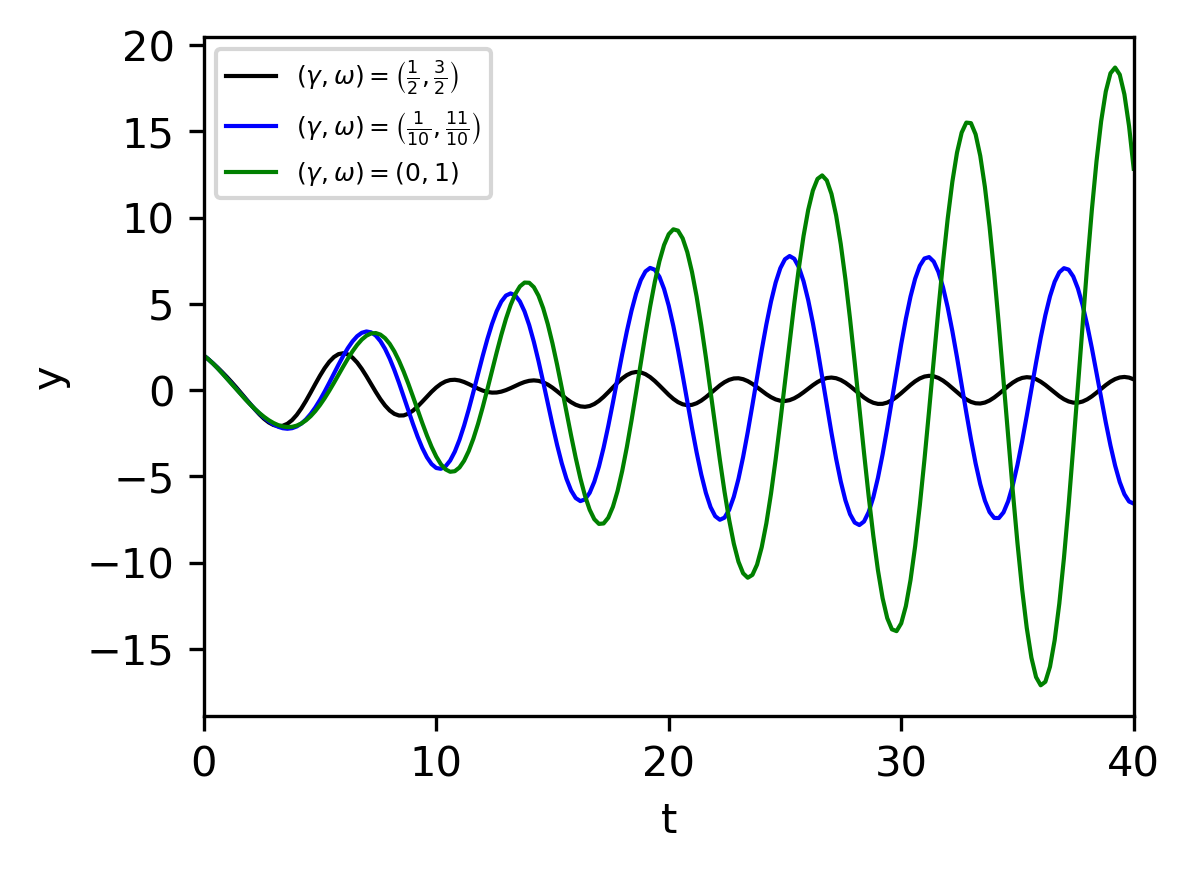

In [23]:
gam, omega = 1/2., 3/2.
f = lambda y, t: np.array([y[1], np.cos(omega*t)-(gam*y[1] /2) - y[0]])
t0 = 0
tf = 40
h = 0.2
y0 = np.array([2, -1])

t, omega1 = rk4(f, h, t0, tf, y0)
gam, omega = 1/10., 11/10.
_, omega2 = rk4(f, h, t0, tf, y0)
gam, omega = 0, 1
_, omega3 = rk4(f, h, t0, tf, y0)

fig = plt.figure()
fig.set_dpi(300)
ax = fig.add_subplot(111)

ax.plot(t, omega1, 'k-',lw=1, label=r'$(\gamma, \omega) = \left(\frac{1}{2}, \frac{3}{2} \right)$')
ax.plot(t, omega2, 'b-', lw=1, label=r'$(\gamma, \omega) = \left(\frac{1}{10}, \frac{11}{10}\right)$')
ax.plot(t, omega3, 'g-', lw=1, label=r'$(\gamma, \omega) = \left(0, 1\right)$')
ax.legend(loc='best', prop={'size':6})
ax.set_xlim([t0, tf])
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()